#### CMSE 201 Final Project (Honors Option)
### &#9989; Archan Tulpule
### &#9989; Section_001
#### &#9989; 3rd December 2021

# __A study of the simulated Value at Risk for a portfolio of 4 stocks over 484 days based on historical data of GOOGL,AAPL,FB, and AMZN__

## Background and Motivation

The stock market is a global environment that hosts millions of transactions and allows firms, indivduals, and governments aorund the world to gain and invest in capital. In the 21st century, technology has been playing an ever-larger role, and financial risk estimation techniques have become more advanced and robust. The Value-at-Risk, or VaR for short, describes the maximum likely loss that an investor might see on an investment over a given time period, to a certain confidence/likelihood (Sahajwani and Manish).

The stock market is both famous and infamous for its randomness, and its wild, erratic behaviour. No one can predict the future value or even direction of an instruments pricing, but in recent years, firms, risk analysts, and statisticians have developed methods of trying to quantify the risk associated with the investment to circumvent having to make predictions, and be more certain about how much they are wiling to lose, and estimate future losses/gains.

This research will try to use the well-known Monte-Carlo method of simulation to try and estimate the VaR for a given time period of 484 days. Specifically, a group of 4 arbitrary stocks were taken: GOOGL,AAPL,FB, and AMZN for Google, Apple, Meta (previously Facebook), and Amazon respectively (theis combination of 4 stocks will be abbreviated to 'GAFA'). The data for these 4 stocks prices were taken from Yahoo finance's historical data section for a time length of 1st January 2020 to 2nd December 2021. 

The reasoning behind using Monte Carlo simulation is simple, since stocks are thought of as random, and since stock prices can be modelled through the Black-Scholes model's geometric brownian motion analytical solution (Geometric brownian motion), it makes sense to use a method that relies on a vast array of different random values.

Considering the various factors considered int this project, and the scope of the research undertaken, the aim of this research is to come to an answer to the following research question:

**How can the Value-at-Risk for an arbitrary 4 stock portfolio be optimized with respect to a 484 day time period?**

The research will try to show how changing investment proportions of a portfolio, and how accounting for a change in a time period may change the risk associated with an investment.

## Methodology

The steps taken in answering the research question consist of some preliminary steps with the real data: first reading in the data for the stock prices for GOOGL,AAPL,FB, and AMZN from 1st Jan 2020 to 2nd December 2021; then using this data to find percentage returns, mean returns, and standard deviation of returns for each stock; from this we can create a variance-covariance matrix which allows for calculating the portfolio mean and standard deviation; we can then calculate the real 1-day VaR given 95% confidence and use this as benchmark for evaluating the model's accuracy.

The actual simulation involves creating a hypothetical portfolio of total $10,000 and with equal investment weight in each of the 4 stocks, and then generating 10000 random returns from a normal distribution for each of 483 days (there are 483 returns for a time period of 484 days), and then finding the cumulative sum of of the returns for each of the 10000 simulations. This allows calculation of the simulated prices of the 4 stocks given the equation of Geometric Brownian Motion described in the Black-Scholes Model. 

This is then simply summed to find the portfolio valuation over time, and a dsitribution and quantiling yields the final VaR value. Later a fucntion is defined to do all of the above simulation for different weighting of the stocks in the portfolio given a constant total investment, this allows for more robust visualization of the VaR with respect to time.

In [1]:
#Importing the relevant packages
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random as rand
from scipy.stats import norm

np.random.seed(22832)

### Reading in the Real data, extracting means and standard deviations, and setting a benchmark VaR

In [2]:
#Setting some constants 

invest_props = np.array([0.25,0.25,0.25,0.25]) # The weight of each stock in the portfolio
init_invest = 10000 # The total inital value of the portfolio



The above cell essentially describes a hypothetical portfolio of 4 stocks with a total inital value of 10,000 dollars where the total value of the stock for each ticker is 2500 dollars.

In [3]:
#Reading the stock price data for each stock from Jan 1st 2020, to December 2nd 2021

#GOOGL stock read in, and the percent changes found between consecutive days to get daily return values
GOOGL = pd.read_csv("GOOGL.csv", delimiter = ",", header = 0, usecols = [0,4]) # reading in
GOOGL_pct_change = GOOGL['Close'].pct_change() # get percent change values to get returns

#AAPL stock read in, and the percent changes found between consecutive days to get daily return values
AAPL = pd.read_csv("AAPL.csv", delimiter = ",", header = 0, usecols = [0,4]) # reading in
AAPL_pct_change = AAPL['Close'].pct_change()# get percent change values to get returns

#FB stock read in, and the percent changes found between consecutive days to get daily return values
FB = pd.read_csv("FB.csv", delimiter = ",", header = 0, usecols = [0,4]) # reading in
FB_pct_change = FB['Close'].pct_change()# get percent change values to get returns

#AMZN stock read in, and the percent changes found between consecutive days to get daily return values
AMZN = pd.read_csv("AMZN.csv", delimiter = ",", header = 0, usecols = [0,4]) # reading in
AMZN_pct_change = AMZN['Close'].pct_change()# get percent change values to get returns

#(Rood et al.)


In [4]:
GOOGL_pct_change.head() #This is what the data looks like

0         NaN
1   -0.005231
2    0.026654
3   -0.001932
4    0.007118
Name: Close, dtype: float64

In [5]:
AAPL_pct_change.head() #This is what the data looks like

0         NaN
1   -0.009722
2    0.007968
3   -0.004703
4    0.016086
Name: Close, dtype: float64

In [6]:
FB_pct_change.head() #This is what the data looks like

0         NaN
1   -0.005291
2    0.018834
3    0.002164
4    0.010138
Name: Close, dtype: float64

In [7]:
AMZN_pct_change.head() #This is what the data looks like

0         NaN
1   -0.012139
2    0.014886
3    0.002092
4   -0.007809
Name: Close, dtype: float64

In [8]:
#Merging all the data so that GAFA stock returns for each day are all shown together

STOCKS_GAFA_RETURNS = pd.DataFrame([GOOGL_pct_change,AAPL_pct_change,FB_pct_change,AMZN_pct_change],index = ["GOOGL","AAPL","FB","AMZN"]).T
STOCKS_GAFA_RETURNS.head() #The data looks like the following

#(Rood et al.)

,GOOGL,AAPL,FB,AMZN
0,NaN,NaN,NaN,NaN
1,-0.005231,-0.009722,-0.005291,-0.012139
2,0.026654,0.007968,0.018834,0.014886
3,-0.001932,-0.004703,0.002164,0.002092
4,0.007118,0.016086,0.010138,-0.007809


In [9]:
#Creating a covariance matrix so that the variance-covariance method of calculating VaR can be applied to this portfolio

cov_matrix_GAFA = STOCKS_GAFA_RETURNS.cov() #creating the covariance matrix
cov_matrix_GAFA #showing the covariance matrix

#(Rood et al.)

,GOOGL,AAPL,FB,AMZN
GOOGL,0.000422,0.000341,0.000374,0.000273
AAPL,0.000341,0.000567,0.000408,0.000327
FB,0.000374,0.000408,0.000603,0.000319
AMZN,0.000273,0.000327,0.000319,0.000419


In [10]:
#calculating the mean and standard deviation of the returns for the GAFA stocks as a whole portfolio
# using the covariance matrix from above

# finding mean returns for each of the 4 GAFA stocks
GAFA_avg_return = STOCKS_GAFA_RETURNS.mean() 
 
#Calculating the portfolio mean by finding the dot product of the portolio average return and the investment weights
GAFA_portfolio_mean = GAFA_avg_return.dot(invest_props)  

# Finding the portfolio standard deviation by findinf the square root of the dot product of the investment weights
# with the dot product of the investment weights with the covariance matrix of the returns 
GAFA_portfolio_std = np.sqrt(invest_props.T.dot(cov_matrix_GAFA).dot(invest_props))
 
# Finding the actual scaled mean of the portfolio from the inital investment and portfolio mean
mean_investment = (1+GAFA_portfolio_mean) * init_invest
             
# Finding the actual scaled standard deviation of the portfolio from the inital investment and portfolio standard deviation
std_investment = init_invest * GAFA_portfolio_std


#(Rood et al.)

In [11]:
# finding the real 1 day VaR for the portfolio to act as the benchmark with a confidence of 95% 

# calculating the lower 5th percentile of the investment using an inverse normal distibution with the paramters 
# of the mean of the portfolio for the mean and the standard deviation of the portfolio for standard deviation
lower_5_percentile_1day = norm.ppf(0.05, mean_investment, std_investment) #significance level is 0.05

#calculating the VaR over 1 day by subtracting the lower 5th percentile value from above from the inital 
# value of the portfolio
VaR_1_day_real = init_invest - lower_5_percentile_1day
print("The benchmark VaR value is $",VaR_1_day_real) #Benchmark value



The benchmark VaR value is $ 305.5634019965237


This means that for a portfolio of 10,000 Dollars for the GAFA stocks of equal weight, the total loss over any 1 day period will not exceed 305.56 Dollars to a confidence of 95%.

### Monte Carlo simulation of the GAFA portfolio

To do the Monte Carlo simulation, the important consideration is that there should be a large amount of simulations, hence 10000 will be taken, as this is a typical value in this type of investigation. Secondly the calcualtion of the prices will be done using the Geometric Brownian Motion model present in the Black-Scholes model. The analytical solution for the Brownian motion is the following (Geometric brownian motion):

$S(t) = S(0)e^{(\mu - \frac{1}{2}\sigma^{2})t - \sigma B(t)}$ 

Where $S(t)$ is the asset price (stock price), $S(0)$ is the inital price of the asset (stock), $\mu$ is the 'drift' of the asset (trend to increase/decrease over time), $\sigma$ is the volatility (standard deviation of the stock), $t$ represents time, and where $B(t)$ is a variable to account for the normally distributed randomness.

For this investigation, the key assumptions in this model are that:
- The returns are normally dsitributed
- The market conditions are standard
- The drift is zero 


(Geometric brownian motion)



In [12]:
#setting the means and standard deviation for each stock

GOOGL_mean = GOOGL_pct_change.mean()
GOOGL_std = GOOGL_pct_change.std()

AAPL_mean = AAPL_pct_change.mean()
AAPL_std = AAPL_pct_change.std()

FB_mean = FB_pct_change.mean()
FB_std = FB_pct_change.std()

AMZN_mean = AMZN_pct_change.mean()
AMZN_std = AMZN_pct_change.std()

# (Vaughan)

print("The standard deviation in returns for GOOGL is $",GOOGL_std)
print("The standard deviation in returns for AAPL is $",AAPL_std)
print("The standard deviation in returns for FB is $",FB_std)
print("The standard deviation in returns for AMZN is $",AMZN_std)


The standard deviation in returns for GOOGL is $ 0.02053776235439206
The standard deviation in returns for AAPL is $ 0.023806223654946373
The standard deviation in returns for FB is $ 0.024557473871274656
The standard deviation in returns for AMZN is $ 0.020476020346353156


In [13]:
# Setting some constants
total_days = 483 #total days
simulations = 10000 #number of simulations
dt = 1 #time interval 

#simulating random returs for each stock from normal distribution
#where parameters for mean and standard deviations is that respective stock's mean and standard deviation
GOOGL_returns_simulate = np.random.normal(GOOGL_mean,dt,(simulations,total_days))
AAPL_returns_simulate = np.random.normal(AAPL_mean,dt,(simulations,total_days))
FB_returns_simulate = np.random.normal(FB_mean,dt,(simulations,total_days))
AMZN_returns_simulate = np.random.normal(AMZN_mean,dt,(simulations,total_days))

#(Vaughan)



In [14]:
#changing numpy arrays to pandas data frame for compatibilty of following functions
GOOGL_returns_convert = pd.DataFrame(GOOGL_returns_simulate)
AAPL_returns_convert = pd.DataFrame(AAPL_returns_simulate)
FB_returns_convert = pd.DataFrame(FB_returns_simulate)
AMZN_returns_convert = pd.DataFrame(AMZN_returns_simulate)



In [15]:
#Finding the cumulative sums of the random returns for each stock for each simulation (row-wise)

#The cumulative random returns are being calculated because for any given day's price, the total random change
#is needed, and not the incremental changes. 

GOOGL_cumu_sums = pd.Series.cumsum(GOOGL_returns_convert, axis = 1)
AAPL_cumu_sums = pd.Series.cumsum(AAPL_returns_convert, axis = 1)
FB_cumu_sums = pd.Series.cumsum(FB_returns_convert, axis = 1)
AMZN_cumu_sums = pd.Series.cumsum(AMZN_returns_convert, axis = 1)

#(Vaughan)

In [16]:
# creating a time series for the data
time_series = np.arange(1,484,1)



In [17]:
#setting some constants


start_invest_val = 2500 #starting value of each stock

r_GOOGL = 0 #drift value set at zero 
r_AAPL = 0 #drift value set at zero 
r_FB = 0 #drift value set at zero 
r_AMZN = 0 #drift value set at zero 



In [18]:
#simulating the stock prices for each stock using the equation shown at the start of this subsection

GOOGL_sim_prices = start_invest_val*np.exp((r_GOOGL-(1/2)*GOOGL_std**2)*time_series + GOOGL_std*GOOGL_cumu_sums)
AAPL_sim_prices = start_invest_val*np.exp((r_AAPL-(1/2)*AAPL_std**2)*time_series + AAPL_std*AAPL_cumu_sums)
FB_sim_prices = start_invest_val*np.exp((r_FB-(1/2)*FB_std**2)*time_series + FB_std*FB_cumu_sums)
AMZN_sim_prices = start_invest_val*np.exp((r_AMZN-(1/2)*AMZN_std**2)*time_series + AMZN_std*AMZN_cumu_sums)

#(Vaughan)

In [19]:
#Adding up all the prices to get the value of the portfolio
total_portfolio = GOOGL_sim_prices + AAPL_sim_prices + FB_sim_prices + AMZN_sim_prices

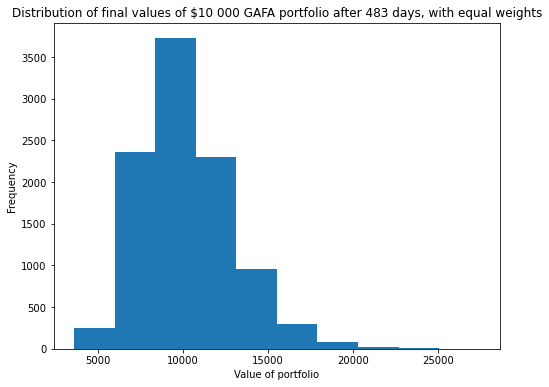

The mean value of the $10,000 GAFA portfolio after 483 days is $ 10209.86219179207


In [20]:
#Creating a histogram to show the distribution of final values for the portfolio after the 483 day period

plt.figure(figsize=(8,6))
plt.hist(total_portfolio[482])
plt.title("Distribution of final values of $10 000 GAFA portfolio after 483 days, with equal weights")
plt.xlabel("Value of portfolio")
plt.ylabel("Frequency")
plt.show()

# Calculating mean value of this portfolio
print("The mean value of the $10,000 GAFA portfolio after 483 days is $",total_portfolio[482].mean())

In [21]:
#calculating the VaR for this portfolio investment after 483 days

VaR_sim = init_invest - np.percentile(total_portfolio[482],5) #significance level of 0.05
print("The VaR of the $10,000 GAFA portfolio after 483 days to a confidence of 95% is $",VaR_sim)

The VaR of the $10,000 GAFA portfolio after 483 days to a confidence of 95% is $ 3524.9993209709146


In [22]:
#testing the model's 1 day VaR with the real value:

#finding the 1 day VaR (just the VaR after a time period of 1, or the first column)
VaR_test = init_invest - np.percentile(total_portfolio[0],5)
print("The 1 day VaR of the model is",VaR_test)

#finding the accuracy of the model:
accuracy = VaR_test/VaR_1_day_real *100

print("The model is",accuracy,"% accurate")

The 1 day VaR of the model is 180.87959316509478
The model is 59.19543766800731 % accurate


In [23]:
#Finding the VaR values for each time-period from 1 day to 483 days
VaR_vals = init_invest - total_portfolio.quantile(q=0.05,axis=0) 

Text(0, 0.5, 'VaR ($)')

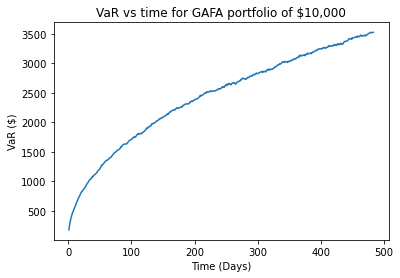

In [24]:
#plotting result of VaR vs time
plt.plot(time_series,VaR_vals)
plt.title("VaR vs time for GAFA portfolio of $10,000")
plt.xlabel("Time (Days)")
plt.ylabel("VaR ($)")

### Defining a Monte-Carlo simulation VaR function and comparing different portfolio weight sets 

In [25]:
#defining a function to calculate VaR vals given a level of investment and a set of weights:
def GAFA_VaR_vals(initial_investment = 10000,investment_weights = np.array([0.25,0.25,0.25,0.25])):
    
    total_days = 483 # number of days is constant
    simulations = 10000 # number of simulations is constant
    dt = 1 #time interval is constant
    
    
    # simulate randon returns using normal distribution as earlier
    GOOGL_returns_simulate = np.random.normal(GOOGL_mean,dt,(simulations,total_days))
    AAPL_returns_simulate = np.random.normal(AAPL_mean,dt,(simulations,total_days))
    FB_returns_simulate = np.random.normal(FB_mean,dt,(simulations,total_days))
    AMZN_returns_simulate = np.random.normal(AMZN_mean,dt,(simulations,total_days))

    # convert to pandas dataframe
    GOOGL_returns_convert = pd.DataFrame(GOOGL_returns_simulate)
    AAPL_returns_convert = pd.DataFrame(AAPL_returns_simulate)
    FB_returns_convert = pd.DataFrame(FB_returns_simulate)
    AMZN_returns_convert = pd.DataFrame(AMZN_returns_simulate)

    #find cumulative sum of incremental random returns to find cumulative returns
    GOOGL_cumu_sums = pd.Series.cumsum(GOOGL_returns_convert, axis = 1)
    AAPL_cumu_sums = pd.Series.cumsum(AAPL_returns_convert, axis = 1)
    FB_cumu_sums = pd.Series.cumsum(FB_returns_convert, axis = 1)
    AMZN_cumu_sums = pd.Series.cumsum(AMZN_returns_convert, axis = 1)

    time_series = np.arange(1,484,1) #define time series

    #set the starting value for each stock as the appropriate fraction of the total 
    #investment based on portfolio weight
    start_invest_GOOGL = investment_weights[0]*initial_investment 
    start_invest_AAPL = investment_weights[1]*initial_investment
    start_invest_FB = investment_weights[2]*initial_investment
    start_invest_AMZN = investment_weights[3]*initial_investment

    #set drift values as zero
    r_GOOGL = 0
    r_AAPL = 0
    r_FB = 0
    r_AMZN = 0

    #calculate the simulated prices
    GOOGL_sim_prices = start_invest_GOOGL*np.exp((r_GOOGL-(1/2)*GOOGL_std**2)*time_series + GOOGL_std*GOOGL_cumu_sums)
    AAPL_sim_prices = start_invest_AAPL*np.exp((r_AAPL-(1/2)*AAPL_std**2)*time_series + AAPL_std*AAPL_cumu_sums)
    FB_sim_prices = start_invest_FB*np.exp((r_FB-(1/2)*FB_std**2)*time_series + FB_std*FB_cumu_sums)
    AMZN_sim_prices = start_invest_AMZN*np.exp((r_AMZN-(1/2)*AMZN_std**2)*time_series + AMZN_std*AMZN_cumu_sums)

    #Find the value of the portfolio at each time
    total_portfolio = GOOGL_sim_prices + AAPL_sim_prices + FB_sim_prices + AMZN_sim_prices

    #calculate VaR values
    VaR_vals = initial_investment - total_portfolio.quantile(q=0.05,axis=0) 

    return VaR_vals #return the VaR values


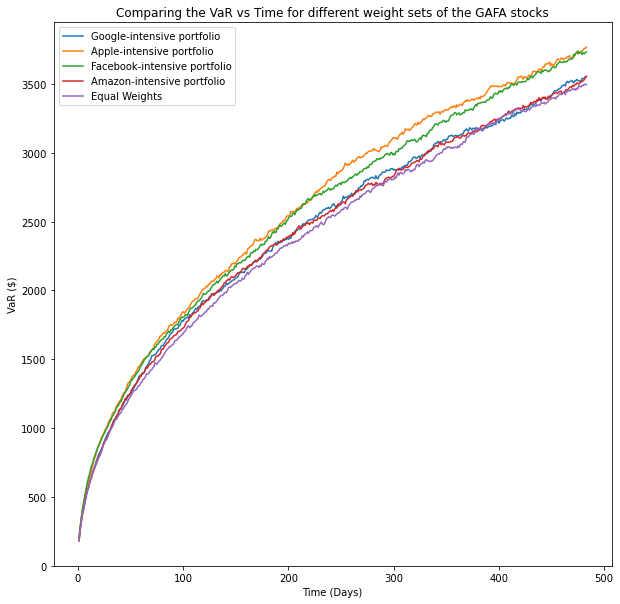

In [26]:
#Final results

#Define 4 sets of weights,each prioritising a different stock while holding the others equal
weight_set_1 = np.array([0.4,0.2,0.2,0.2])
weight_set_2 = np.array([0.2,0.4,0.2,0.2])
weight_set_3 = np.array([0.2,0.2,0.4,0.2])
weight_set_4 = np.array([0.2,0.2,0.2,0.4]) 

#create a hypothetical total investment
investment_hypothetical = 10000

#call the function from above to get 4 differnt sets of VaR values corresponding to the different weights
GAFA_VaR_set_1 = GAFA_VaR_vals(investment_hypothetical,weight_set_1)
GAFA_VaR_set_2 = GAFA_VaR_vals(investment_hypothetical,weight_set_2)
GAFA_VaR_set_3 = GAFA_VaR_vals(investment_hypothetical,weight_set_3)
GAFA_VaR_set_4 = GAFA_VaR_vals(investment_hypothetical,weight_set_4)

# Set the equal weighted portfolio as the baseline
GAFA_VaR_baseline = GAFA_VaR_vals(investment_hypothetical)

plt.figure(figsize = (10,10)) #set figure 


#Plot each of the VaR value sets vs time
plt.plot(time_series,GAFA_VaR_set_1, label = "Google-intensive portfolio")
plt.plot(time_series,GAFA_VaR_set_2, label = "Apple-intensive portfolio")
plt.plot(time_series,GAFA_VaR_set_3, label = "Facebook-intensive portfolio")
plt.plot(time_series,GAFA_VaR_set_4, label = "Amazon-intensive portfolio")
plt.plot(time_series,GAFA_VaR_baseline, label = "Equal Weights")

plt.xlabel("Time (Days)")
plt.ylabel("VaR ($)")
plt.title("Comparing the VaR vs Time for different weight sets of the GAFA stocks")

plt.legend()
plt.show()







## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

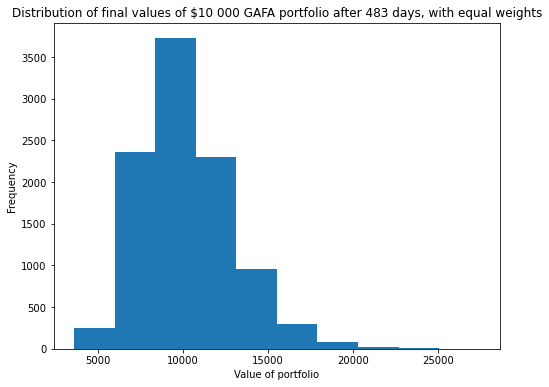

The mean value of the $10,000 GAFA portfolio after 483 days is $ 10209.86219179207


In [27]:
#Creating a histogram to show the distribution of final values for the portfolio after the 483 day period

plt.figure(figsize=(8,6))
plt.hist(total_portfolio[482])
plt.title("Distribution of final values of $10 000 GAFA portfolio after 483 days, with equal weights")
plt.xlabel("Value of portfolio")
plt.ylabel("Frequency")
plt.show()

# Calculating mean value of this portfolio
print("The mean value of the $10,000 GAFA portfolio after 483 days is $",total_portfolio[482].mean())

The research has shown that the final value of the portfolio has a log-normal distribution (as the right tail is longer than the left), and that the mean for the distribution is at 10209.86219179207. The 1 day VaR of the model was found to be 180.87959316509478 for an equal weighted portfolio to a confidence of 95%. The model was found to be 59.19543766800731 % accurate, as the benchmark VaR value was found to be 305.5634019965237.

Text(0, 0.5, 'VaR ($)')

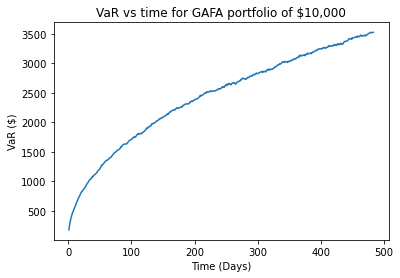

In [28]:
#plotting result of VaR vs time
plt.plot(time_series,VaR_vals)
plt.title("VaR vs time for GAFA portfolio of $10,000")
plt.xlabel("Time (Days)")
plt.ylabel("VaR ($)")

The plot above shows that VaR increases with the square root of time, and this is confirmed by research: "1 day VaR and multiplying it by the square root of the time period " (Rood et al.). This shows that the relative risk of an investment decreases with time because although the absolute risk increases, the proportion of risk undertaken over time period seems to get smaller.

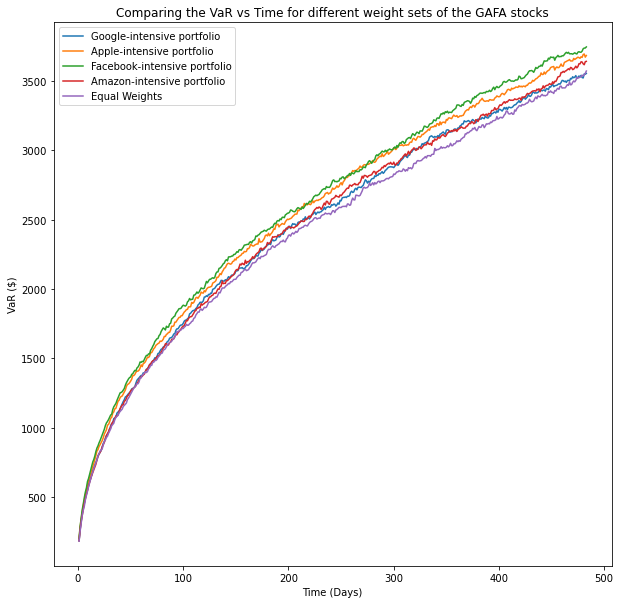

In [29]:
#Final results

#Define 4 sets of weights,each prioritising a different stock while holding the others equal
weight_set_1 = np.array([0.4,0.2,0.2,0.2])
weight_set_2 = np.array([0.2,0.4,0.2,0.2])
weight_set_3 = np.array([0.2,0.2,0.4,0.2])
weight_set_4 = np.array([0.2,0.2,0.2,0.4]) 

#create a hypothetical total investment
investment_hypothetical = 10000

#call the function from above to get 4 differnt sets of VaR values corresponding to the different weights
GAFA_VaR_set_1 = GAFA_VaR_vals(investment_hypothetical,weight_set_1)
GAFA_VaR_set_2 = GAFA_VaR_vals(investment_hypothetical,weight_set_2)
GAFA_VaR_set_3 = GAFA_VaR_vals(investment_hypothetical,weight_set_3)
GAFA_VaR_set_4 = GAFA_VaR_vals(investment_hypothetical,weight_set_4)

# Set the equal weighted portfolio as the baseline
GAFA_VaR_baseline = GAFA_VaR_vals(investment_hypothetical)

plt.figure(figsize = (10,10)) #set figure 


#Plot each of the VaR value sets vs time
plt.plot(time_series,GAFA_VaR_set_1, label = "Google-intensive portfolio")
plt.plot(time_series,GAFA_VaR_set_2, label = "Apple-intensive portfolio")
plt.plot(time_series,GAFA_VaR_set_3, label = "Facebook-intensive portfolio")
plt.plot(time_series,GAFA_VaR_set_4, label = "Amazon-intensive portfolio")
plt.plot(time_series,GAFA_VaR_baseline, label = "Equal Weights")

plt.xlabel("Time (Days)")
plt.ylabel("VaR ($)")
plt.title("Comparing the VaR vs Time for different weight sets of the GAFA stocks")

plt.legend()
plt.show()





The final results reveal that the sets which prioritise stocks with the higher standard deviation, AAPL and FB, have a higher VaR than the stocks which prioritise stocks with a lower standard deviation, GOOGL and AMZN. Although the VaR values seem to be approximately the same at lower time periods, the values start diverging gradually. AAPL and FB seem to have a 483 day VaR value of around 3700, while GOOGL and AMZN seem to have VAR values of 3500.

## Discussion and Conclusion

I learned that using a Monte Carlo simulaution to estimate the final value of 10,000 dollar GAFA portfolio and then plotting a distribution yielded a log-normal distribution. The mean was found to be 10209.86219179207 dollars, which indicates that on average, you would expect to make a gain of around 200 dollars. What's more I found that although the assumptions were extremely simplistic and the model used was made more straightforward, the accuracy of the model was approximately 60%.

I learned that the real day VaR on this hypothetical portfolio is about 306. Furthermore, I learned that the model showed that the 1 day VaR for all the studied sets of portfolio weights start at around 200 dollars, but then later diverge until at the 383 day time period the FB-intensive set and AAPL-intensive set have VaR values of 3700 dollars whereas the baseline, GOOGL-intensive, and AMZN-intensive sets have lower VaR values of 3500 dollars.

The main obstacle I ran into was trying to figure out how to get stock data for multiple stocks in a simple, efficient way, I tried to explore the yfinance package, but that didn't work because of an issue importing the package into the Conda dsitribution of python on my laptop, therefor, I went directly to yahoo finance, and found that data could be downloaded directly.

The other large obstacle I faced was how to avoid looping when conducting the Monte Carlo simulation, since this puts a larger computational burden on the device's processor and also increases computation time significantly. I found the Black Scholes model and found that the previous price was not needed to generate the next once, rather only a starting price and the cumulative random changes with time.

Next time, I will try to upgrade the level of my investigation by not assuming a normal distribution, I will also try to incorporate more factors from the Black-Scholes model such as drift to try and produce a highly realistic representation of the stocks and their returns. For example, I would explore the implicaations of having drift values of 0.0, 0.1, 0.2, 0.3...1.0, since in this investigation they were kept constant at zero.

### References

Sahajwani, Manish, and Sheeba Manish. “Value at Risk (VAR) of a Portfolio.” Finance Train, 2021, https://financetrain.com/value-at-risk-of-a-portfolio.

Vaughan, Davis. “Financial Numerical Methods - Part 1: Vectorized Stock Price Simulation.” Data Insights, Davis Vaughan, 2017, https://blog.davisvaughan.com/2017/08/28/fin-num-methods-1/. Accessed 21 Nov. 2021.

Rood, Erik, and Crystal Wesnoski. “Calculating Value at Risk (VAR) of a Stock Portfolio Using Python.” Data Interview Questions - Data Interview Questions, Data Interview Qs, https://www.interviewqs.com/blog/value-at-risk.

QUANTSTART. “Geometric Brownian Motion.” QuantStart, QUANTSTART, https://www.quantstart.com/articles/Geometric-Brownian-Motion/.

Yahoo Finance. “Yahoo Finance - Stock Market Live, Quotes, Business &amp; Finance News.” Yahoo! Finance, Yahoo!, 2021, https://finance.yahoo.com/. 